<a href="https://colab.research.google.com/github/ucoksan/e_commerce_transaction/blob/main/W7W8W9_malvin_kurniawan_intermediate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statistics

# **Python Intermediate Assignment**

## **1. Load all datasets**

In [ ]:
sheet1_url = 'https://drive.google.com/file/d/1R9g5f310AA1Zmrnmd8P8jclnyToN54Bx/view?usp=sharing'
sheet1_url = 'https://drive.google.com/uc?id=' + sheet1_url.split('/')[-2]
df_order = pd.read_csv(sheet1_url)
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [ ]:
sheet2_url = 'https://drive.google.com/file/d/1S_BzA_P4v26oIvErtB4Ta64fQB53Hw1_/view?usp=sharing'
sheet2_url = 'https://drive.google.com/uc?id=' + sheet2_url.split('/')[-2]
df_cust = pd.read_csv(sheet2_url)
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [ ]:
sheet3_url = 'https://drive.google.com/file/d/1JBzMoiRBy6YsxHoS3OhysRcZZyRh5DQD/view?usp=sharing'
sheet3_url = 'https://drive.google.com/uc?id=' + sheet3_url.split('/')[-2]
df_payment = pd.read_csv(sheet3_url)
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


## **2. Clean all Dataset**

For analysis, we will drop several irrelevant column.

In [ ]:
# Drop irrelevant column from df_order data frame
order_column = df_order.columns.tolist()
order_drop = df_order.drop(columns=order_column[4:6])
order_drop.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26 00:00:00


Now, we will change the `order_purchase_timestamp`,`order_delivered_customer_date` & `order_estimated_delivery_date` data type to timeseries.

In [ ]:
order_convert = order_drop.copy()
order_convert['order_purchase_timestamp'] = pd.to_datetime(order_convert['order_purchase_timestamp'])
order_convert['order_delivered_customer_date'] = pd.to_datetime(order_convert['order_delivered_customer_date'])
order_convert['order_estimated_delivery_date'] = pd.to_datetime(order_convert['order_estimated_delivery_date'])
order_convert.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


In [ ]:
order_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_delivered_customer_date  96476 non-null  datetime64[ns]
 5   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](3), object(3)
memory usage: 4.6+ MB


Now, we will check for missing value.

In [ ]:
total_missing_data = order_convert.isnull().sum()
percentage_missing = total_missing_data/len(order_convert)*100
check_missing_val = pd.DataFrame({'column_name': order_convert.columns,'total_missing': total_missing_data,'percentage_missing':percentage_missing})
check_missing_val

,column_name,total_missing,percentage_missing
order_id,order_id,0,0.000000
customer_id,customer_id,0,0.000000
order_status,order_status,0,0.000000
order_purchase_timestamp,order_purchase_timestamp,0,0.000000
order_delivered_customer_date,order_delivered_customer_date,2965,2.981668
order_estimated_delivery_date,order_estimated_delivery_date,0,0.000000


There are 2965 missing data or 2.98% of total rows on `order_delivered_customer_date` column.
For handling those missing data, we will delete the records with `order_status` is `delivered` and change the rest to string "Unknown".

In [ ]:
# Change value with order_status column's value != 'delivered' with 'Unknown'
order_drop_1 = order_convert.copy()
cond_1 = (order_drop_1['order_status']!='delivered')
order_drop_1.loc[order_drop_1['order_delivered_customer_date'].isnull() & cond_1, 'order_delivered_customer_date'] = 'Unkonwn'
order_drop_1.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    8
order_estimated_delivery_date    0
dtype: int64

Now, we will drop the rest of missing data.

In [ ]:
order_drop_2 = order_drop_1.copy()
order_drop_2 = order_drop_2.dropna()
order_drop_2.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

After handling the missing values, we will check duplicate rows, by checking order_id which should be unique value for each rows.

In [ ]:
# Check duplicate data on order_id column
order_dup = order_drop_2.copy()
order_dup[order_dup['order_id'].duplicated()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date


There is no duplicate value for `order_id` column.

In [ ]:
order_dup.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99433 entries, 0 to 99440
Data columns (total 6 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99433 non-null  object        
 1   customer_id                    99433 non-null  object        
 2   order_status                   99433 non-null  object        
 3   order_purchase_timestamp       99433 non-null  datetime64[ns]
 4   order_delivered_customer_date  99433 non-null  object        
 5   order_estimated_delivery_date  99433 non-null  datetime64[ns]
dtypes: datetime64[ns](2), object(4)
memory usage: 5.3+ MB


Now we will check unique value for `order_status` column to check if there is any typo.

In [ ]:
order_dup['order_status'].unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [ ]:
# Create copy dataset as final order dataset
order_clean = order_dup.copy()
order_clean.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26


Now we will clean for customer Data Frame (df_cust)

In [ ]:
df_cust.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


For analysis, we will drop irrelevant column.

In [ ]:
# Drop irrelevant column from df_cust data frame
cust_column = df_cust.columns.tolist()
cust_drop = df_cust.drop(columns=cust_column[2:3])
cust_drop.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


Now we will check duplicate value for customer_id column, which is prohibited to have same value.

In [ ]:
cust_drop[cust_drop['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


There is no duplicate value for customer Data Frame

Now we will check for missing values.

In [ ]:
cust_drop.isnull().sum()

customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

There is no missing value for customer Data Frame

In [ ]:
# Check for unique value in customer_city column
cust_drop['customer_city'].unique()

array(['franca', 'sao bernardo do campo', 'sao paulo', ...,
       'monte bonito', 'sao rafael', 'eugenio de castro'], dtype=object)

In [ ]:
# Check for unique value in customer_state column
cust_drop['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

Now, we will check duplicate value for customer dataset.

In [ ]:
# Check duplicate data on customer_id column
cust_drop[cust_drop['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_city,customer_state


Fortunately, there is no duplicate value in customer_id.

In [ ]:
# Create copy dataset as final customer dataset
cust_clean = cust_drop.copy()
cust_clean.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


Now we will clean for payment Data Frame (df_payment)

In [ ]:
df_payment.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
df_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


First of all, we will change `payment_squential` and `payment_installments` data type to string, since the value of these columns are categorical.

In [ ]:
payment_convert = df_payment.copy()
payment_convert['payment_sequential'] = payment_convert['payment_sequential'].astype('str')
payment_convert['payment_installments'] = payment_convert['payment_installments'].astype('str')
payment_convert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  object 
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  object 
 4   payment_value         103886 non-null  float64
dtypes: float64(1), object(4)
memory usage: 4.0+ MB


Now, we will check unique value for `payment_squential`,`payment_type` and `payment_installments` columns.

In [ ]:
print('Unique value for payment_type :')
print(payment_convert['payment_type'].unique())
print('============================================================')
print('Unique value for payment_sequential:')
print(payment_convert['payment_sequential'].unique())
print('============================================================')
print('Unique value for payment_installments:')
print(payment_convert['payment_installments'].unique())

Unique value for payment_type :
['credit_card' 'boleto' 'voucher' 'debit_card' 'not_defined']
Unique value for payment_sequential:
['1' '2' '4' '5' '3' '8' '6' '7' '10' '11' '17' '19' '27' '12' '9' '15'
 '13' '14' '16' '25' '22' '26' '29' '28' '18' '21' '24' '23' '20']
Unique value for payment_installments:
['8' '1' '2' '3' '6' '5' '4' '10' '7' '12' '9' '13' '15' '24' '11' '18'
 '14' '20' '21' '17' '22' '0' '16' '23']


There is no typo/ error in categorical columns, so we will move for checking missing value for each columns.

In [ ]:
payment_convert.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

Now, we will check for duplicate value on order_id column.

Fortunately, there is no missing value for payment dataset.

In [ ]:
# Check duplicate data on order_id column
payment_convert[payment_convert['order_id'].duplicated()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
1456,683bf306149bb869980b68d48a1bd6ab,1,credit_card,1,8.58
2324,e6a66a8350bb88497954d37688ab123e,2,voucher,1,10.51
2393,8e5148bee82a7e42c5f9ba76161dc51a,1,credit_card,1,0.67
2414,816ccd9d21435796e8ffa9802b2a782f,1,credit_card,1,5.65
2497,2cbcb371aee438c59b722a21d83597e0,2,voucher,1,7.80
...,...,...,...,...,...
103778,fd86c80924b4be8fb7f58c4ecc680dae,1,credit_card,1,76.10
103817,6d4616de4341417e17978fe57aec1c46,1,credit_card,1,19.18
103860,31bc09fdbd701a7a4f9b55b5955b8687,6,voucher,1,77.99
103869,c9b01bef18eb84888f0fd071b8413b38,1,credit_card,6,238.16


There are 4446 rows with duplicate value in orde_id column, we will drop the duplicate value.

In [ ]:
payment_dup = payment_convert.copy()
payment_dup = payment_dup.drop_duplicates(subset=['order_id'])
payment_dup.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [ ]:
# Check total rows before and after deleting duplicates value
print('Before deleting duplicate values :')
print(len(payment_convert))
print('==========================================')
print('After deleting duplicate values :')
print(len(payment_dup))
print('==========================================')

Before deleting duplicate values :
103886
After deleting duplicate values :
99440


In [ ]:
# Create copy dataset as final customer dataset
pay_clean = payment_dup.copy()
pay_clean.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


Now we will join all three dataset before we handling with outliers data.

In [ ]:
df_join = order_clean.merge(cust_clean,on='customer_id').merge(pay_clean,on='order_id')
df_join.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99432 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99432 non-null  object        
 1   customer_id                    99432 non-null  object        
 2   order_status                   99432 non-null  object        
 3   order_purchase_timestamp       99432 non-null  datetime64[ns]
 4   order_delivered_customer_date  99432 non-null  object        
 5   order_estimated_delivery_date  99432 non-null  datetime64[ns]
 6   customer_unique_id             99432 non-null  object        
 7   customer_city                  99432 non-null  object        
 8   customer_state                 99432 non-null  object        
 9   payment_sequential             99432 non-null  object        
 10  payment_type                   99432 non-null  object        
 11  payment_install

After joining all datasets into 1 dataset, we will check for outliers in `payment_value` column.

In [ ]:
drop_outliers = df_join.copy()
q1 = drop_outliers['payment_value'].quantile(0.25)
q3 = drop_outliers['payment_value'].quantile(0.75)
iqr = q3 - q1
c_min = q1 - 1.5*iqr
c_max = q3 + 1.5*iqr
print('Q1: ',q1)
print('Q3: ',q3)
print('IQR: ',iqr)
print('Min: ',c_min)
print('Max: ',c_max)

Q1:  60.05
Q3:  175.115
IQR:  115.06500000000001
Min:  -112.54750000000003
Max:  347.71250000000003


In [ ]:
print('Total rows before remove outliers ',len(drop_outliers))

# Remove the outliers
drop_outliers = drop_outliers[(drop_outliers['payment_value'] >= c_min) & (drop_outliers['payment_value'] < c_max)]
print('Total rows after remove outliers ',len(drop_outliers))

Total rows before remove outliers  99432
Total rows after remove outliers  91662


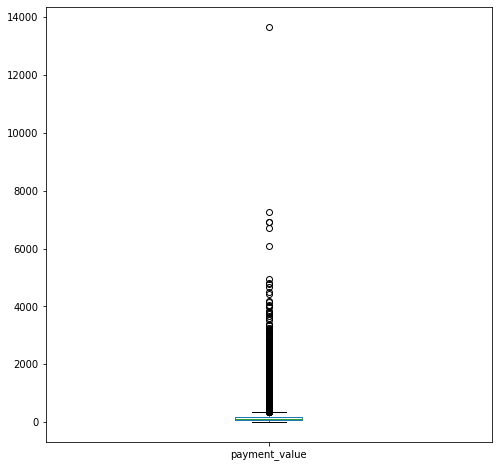

In [ ]:
# Before remove outliers
df_join.boxplot(column = 'payment_value',fontsize=10,rot=0,grid=False,figsize=(8,8))

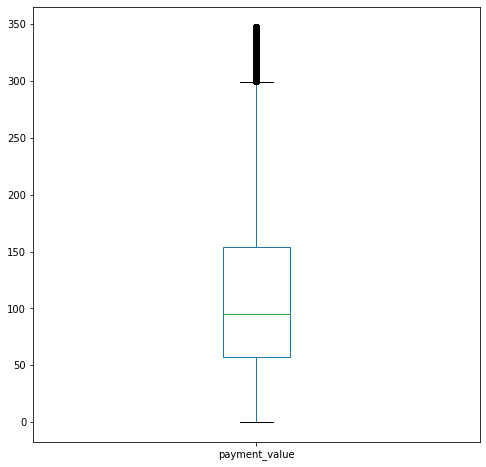

In [ ]:
# After remove outliers
drop_outliers.boxplot(column = 'payment_value',fontsize=10,rot=0,grid=False,figsize=(8,8))

After remove the outliers, for final checking, we will check for total value for each categorical column.

In [ ]:
cat_column = ['payment_sequential','payment_type']
for i in cat_column:
  rows_count = drop_outliers[i].value_counts()
  print(rows_count,'\n')

1     90079
2      1306
3       150
4        54
5        24
6        20
7         9
8         7
10        5
11        2
14        1
27        1
15        1
17        1
19        1
9         1
Name: payment_sequential, dtype: int64 

credit_card    69029
boleto         18514
voucher         2673
debit_card      1443
not_defined        3
Name: payment_type, dtype: int64 



In [ ]:
# We will remove rows with payment_sequential is 'not_defined'

remove_value = drop_outliers[drop_outliers['payment_type'].isin(['credit_card','boleto','voucher','debit_card'])]
remove_value.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
# Final dataset
df = remove_value.copy()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91659 non-null  object        
 1   customer_id                    91659 non-null  object        
 2   order_status                   91659 non-null  object        
 3   order_purchase_timestamp       91659 non-null  datetime64[ns]
 4   order_delivered_customer_date  91659 non-null  object        
 5   order_estimated_delivery_date  91659 non-null  datetime64[ns]
 6   customer_unique_id             91659 non-null  object        
 7   customer_city                  91659 non-null  object        
 8   customer_state                 91659 non-null  object        
 9   payment_sequential             91659 non-null  object        
 10  payment_type                   91659 non-null  object        
 11  payment_install

## **3. Descriptive Statistics**

For descriptive statistics, we will use only column with numeric value. In this case `payment_value` column.

For further information, we will calculate descriptive statistics for additional variable (`order_delivery_time`) which we will add later.

### Payment Value Variable

#### i. Count, mean, standard deviation, max value, min value, Q1, median, Q3

In [ ]:
df.describe()

,payment_value
count,91659.000000
mean,113.412471
std,72.603936
min,0.010000
25%,57.110000
50%,95.370000
75%,154.100000
max,347.700000


* Total record of all cleaned dataset is 91,659 rows.
* Average of payment value is 113.4
* Standard deviation for payment value is 72.6
* The median of payment value (95.37) < average of the dataset (113.4)
* The values of payment value are quite spread widely.

---


#### ii.Range

In [ ]:
range_pay = max(df['payment_value'])-min(df['payment_value'])
print('Range payment_value: ',range_pay)

Range payment_value:  347.69


The range of payment value is quite large, eventough the minimum value is 0 which means the transaction is failed/ not successful, by looking at the range of Q1 and maximum value, it still quite large.

---



#### iii. Variance

In [ ]:
var_pay = statistics.variance(df['payment_value'])
print('Variance payment_value: ',var_pay)

Variance payment_value:  5271.331544922897


The payment value is widely spread within the range of the data.

---



#### iv. Coefficient of Variance (std/mean)

In [ ]:
cov_pay = np.std(df['payment_value'])/np.mean(df['payment_value'])
print('Coefficient of Variance payment_value: ',cov_pay)

Coefficient of Variance payment_value:  0.640172454698335


#### v. Skewness

In [ ]:
df.skew(numeric_only = True)

payment_value    1.014957
dtype: float64

Payment value data has positive skewness

---

#### vi. Kurtosis

In [ ]:
df.kurtosis(numeric_only = True)

payment_value    0.508902
dtype: float64

Payment value data flat relative to normal distribution

---



### Delivery Time Variable

For delivery time variable, we need to create another table which only consisting rows for `order_status` = "delivered". Then we calculate time difference between `order_delivered_customer_date` column and `order_purchase_timestamp` column.

In [ ]:
df_deliver = df[df['order_status']=='delivered']
df_deliver.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89037 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89037 non-null  object        
 1   customer_id                    89037 non-null  object        
 2   order_status                   89037 non-null  object        
 3   order_purchase_timestamp       89037 non-null  datetime64[ns]
 4   order_delivered_customer_date  89037 non-null  object        
 5   order_estimated_delivery_date  89037 non-null  datetime64[ns]
 6   customer_unique_id             89037 non-null  object        
 7   customer_city                  89037 non-null  object        
 8   customer_state                 89037 non-null  object        
 9   payment_sequential             89037 non-null  object        
 10  payment_type                   89037 non-null  object        
 11  payment_install

In [ ]:
df_deliver['order_delivered_customer_date'] = pd.to_datetime(df_deliver['order_delivered_customer_date'])
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89037 entries, 0 to 99431
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89037 non-null  object        
 1   customer_id                    89037 non-null  object        
 2   order_status                   89037 non-null  object        
 3   order_purchase_timestamp       89037 non-null  datetime64[ns]
 4   order_delivered_customer_date  89037 non-null  datetime64[ns]
 5   order_estimated_delivery_date  89037 non-null  datetime64[ns]
 6   customer_unique_id             89037 non-null  object        
 7   customer_city                  89037 non-null  object        
 8   customer_state                 89037 non-null  object        
 9   payment_sequential             89037 non-null  object        
 10  payment_type                   89037 non-null  object        
 11  payment_install

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df_deliver['order_delivery_time'] = df_deliver['order_delivered_customer_date']-df_deliver['order_purchase_timestamp']
df_deliver['order_delivery_time'] = df_deliver['order_delivery_time'].dt.days
df_deliver.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_delivery_time
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,8
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,9
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,13
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2


In [ ]:
# Check outliers
q1_deliver = df_deliver['order_delivery_time'].quantile(0.25)
q3_deliver = df_deliver['order_delivery_time'].quantile(0.75)
iqr_deliver = q3 - q1
d_min = q1_deliver - 1.5*iqr_deliver
d_max = q3_deliver + 1.5*iqr_deliver
print('Q1: ',q1_deliver)
print('Q3: ',q3_deliver)
print('IQR: ',iqr_deliver)
print('Min: ',d_min)
print('Max: ',d_max)

Q1:  6.0
Q3:  15.0
IQR:  115.06500000000001
Min:  -166.59750000000003
Max:  187.59750000000003


In [ ]:
# Remove the outliers
df_deliver = df_deliver[(df_deliver['order_delivery_time'] >= d_min) & (df_deliver['order_delivery_time'] < d_max)]

In [ ]:
df_deliver.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89030 entries, 0 to 99431
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89030 non-null  object        
 1   customer_id                    89030 non-null  object        
 2   order_status                   89030 non-null  object        
 3   order_purchase_timestamp       89030 non-null  datetime64[ns]
 4   order_delivered_customer_date  89030 non-null  datetime64[ns]
 5   order_estimated_delivery_date  89030 non-null  datetime64[ns]
 6   customer_unique_id             89030 non-null  object        
 7   customer_city                  89030 non-null  object        
 8   customer_state                 89030 non-null  object        
 9   payment_sequential             89030 non-null  object        
 10  payment_type                   89030 non-null  object        
 11  payment_install

#### i. Count, mean, standard deviation, max value, min value, Q1, median, Q3

In [ ]:
df_deliver['order_delivery_time'].describe()

count    89030.000000
mean        11.935134
std          9.255071
min          0.000000
25%          6.000000
50%         10.000000
75%         15.000000
max        187.000000
Name: order_delivery_time, dtype: float64

* Total record of delivered order is 89,030 rows.
* Average of delivery time is 11 days
* Standard deviation for delivery time is 9
* The median of delivery time (10) < average of the dataset (11)
* The values of delivery time are not spread widely.

---


#### ii. Range

In [ ]:
range_time = max(df_deliver['order_delivery_time'])-min(df_deliver['order_delivery_time'])
print('Range order_delivery_time: ',range_time)

Range order_delivery_time:  187


The range of delivery time is quite large.


---




#### iii. Variance

In [ ]:
var_time = statistics.variance(df_deliver['order_delivery_time'])
print('Variance order_delivery_time: ',var_time)

Variance order_delivery_time:  85.65634119383593


Delivery time value is not widely spread within the range of the data comparing to previous payment value data.

---



#### iv. Coefficient of Variance (std/mean)

In [ ]:
cov_time = np.std(df_deliver['order_delivery_time'])/np.mean(df_deliver['order_delivery_time'])
print('Coefficient of Variance order_delivery_time: ',cov_time)

Coefficient of Variance order_delivery_time:  0.775443238046104


#### v. Skewness

In [ ]:
df_deliver.skew(numeric_only = True)

payment_value          1.016167
order_delivery_time    3.293165
dtype: float64

Delivery time data has positive skewness

---



#### vi. Kurtosis

In [ ]:
df_deliver.kurtosis(numeric_only = True)

payment_value           0.515850
order_delivery_time    27.892514
dtype: float64

Delivery time data peaked relative to normal distribution

---


## **4. EDA & Data Visualization**

### **A. Numbers of Orders per month**

In [ ]:
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62


In [ ]:
# Create column of month-year 
df['month'] = pd.DatetimeIndex(df['order_purchase_timestamp']).month
df['year'] = pd.DatetimeIndex(df['order_purchase_timestamp']).year
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month,year
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,10,2017
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,7,2018
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,8,2018
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,11,2017
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2,2018


In [ ]:
# Create dataframe for EDA
eda1 = df.groupby(['year','month'])['order_id'].count()
eda1 = pd.DataFrame(eda1)
eda1.reset_index(inplace=True)
eda1['month_year'] = eda1['month'].astype(str)+'/'+eda1['year'].astype(str)
eda1

,year,month,order_id,month_year
0,2016,9,3,9/2016
1,2016,10,285,10/2016
2,2016,12,1,12/2016
3,2017,1,706,1/2017
4,2017,2,1632,2/2017
5,2017,3,2458,3/2017
6,2017,4,2195,4/2017
7,2017,5,3408,5/2017
8,2017,6,3011,6/2017
9,2017,7,3758,7/2017


In [ ]:
eda1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   year        25 non-null     int64 
 1   month       25 non-null     int64 
 2   order_id    25 non-null     int64 
 3   month_year  25 non-null     object
dtypes: int64(3), object(1)
memory usage: 928.0+ bytes


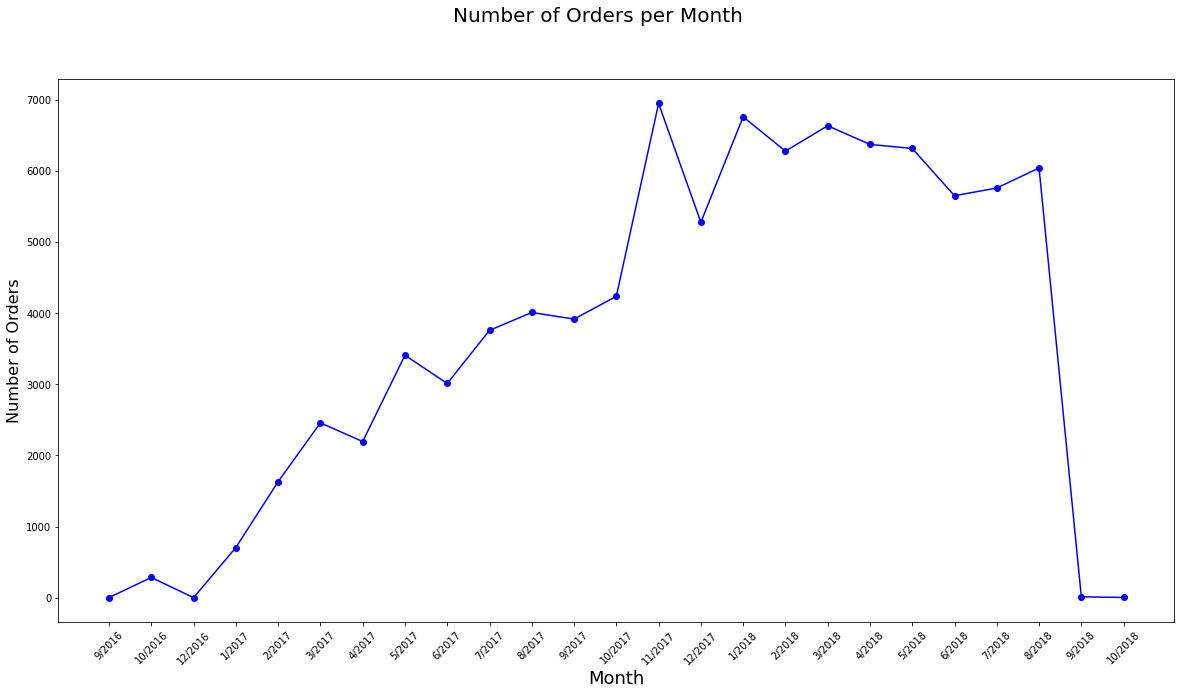

In [ ]:
# Create timeline chart
fig = plt.figure(figsize=(20,10))
fig.suptitle('Number of Orders per Month', fontsize=20)
plt.xlabel('Month',fontsize=18)
plt.ylabel('Number of Orders',fontsize=16)
plt.xticks(rotation=45)
x = eda1['month_year']
y = eda1['order_id']
plt.plot(x,y,'bo-')
plt.show()

**Insight**



1. The total orders trend during the period (Sep 2016 - Aug 2018) tends to increase
2. There is very significant decrease of total orders in Sep 2018 to Oct 2018, this probably happen because the lack of data for current transactions. Further analysis need to be done.
3. There are several months which order trends suddenly increase (May 2017, Nov 2017, Jan 2018). The cause of these anomaly needs to be investigate further.

### **B. Daily Orders Trend**

In [ ]:
# Create days column
df['days'] = df['order_purchase_timestamp'].dt.day_name()
df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,month,year,days
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,1,credit_card,1,18.12,10,2017,Monday
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,barreiras,BA,1,boleto,1,141.46,7,2018,Tuesday
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,1,credit_card,3,179.12,8,2018,Wednesday
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,1,credit_card,1,72.20,11,2017,Saturday
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,1,credit_card,1,28.62,2,2018,Tuesday


In [ ]:
# Create dataframe for analysis
week_day = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
eda2 = df.groupby('days')['order_id'].count().reindex(week_day)
eda2 = pd.DataFrame(eda2)
eda2.reset_index(inplace=True)
eda2.columns = ['days','number_of_orders']
eda2

,days,number_of_orders
0,Monday,14899
1,Tuesday,14737
2,Wednesday,14311
3,Thursday,13605
4,Friday,12975
5,Saturday,10019
6,Sunday,11113


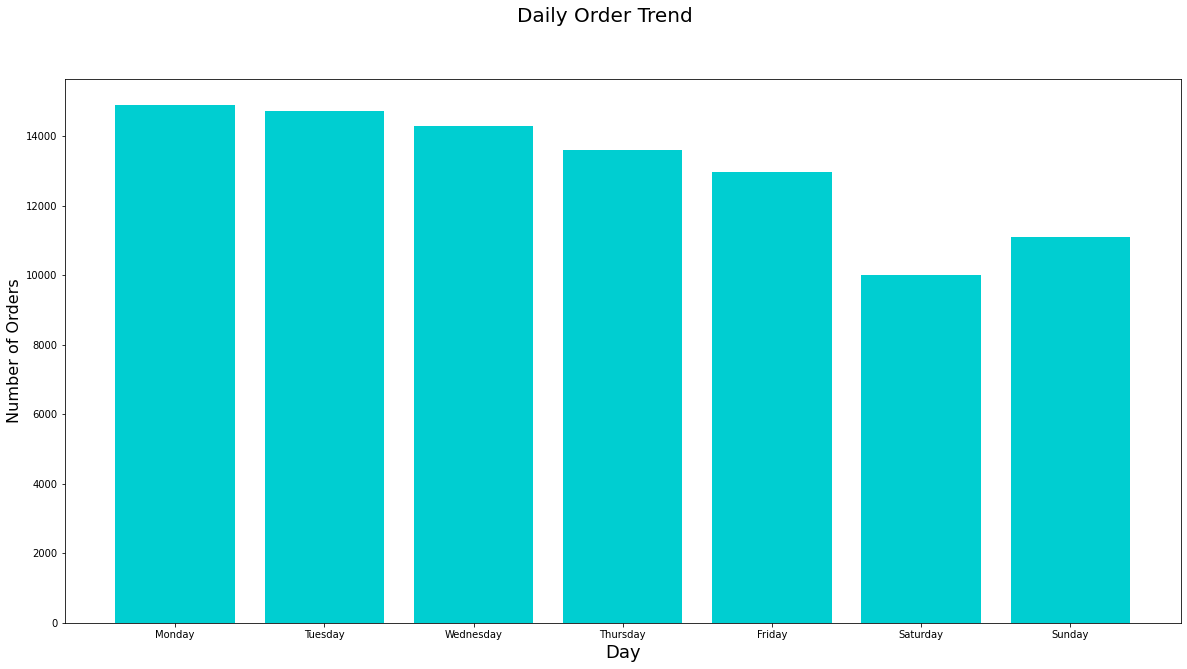

In [ ]:
fig = plt.figure(figsize=(20, 10))

fig.suptitle('Daily Order Trend', fontsize=20)
plt.xlabel('Day', fontsize=18)
plt.ylabel('Number of Orders', fontsize=16)

x = eda2['days']
y = eda2['number_of_orders']
plt.bar(x, y,color='darkturquoise')
plt.show()

**Insight**




1. Most of the transactions occur in weekdays (Monday - Friday), while weekend have less number of transactions.
2. Monday is the day which have most number of transactions, but not significant comparing to other weekdays.
3. While Saturday is day with least transaction occur.





### **C. Percentage of Orders Per Payment Type**

In [ ]:
# Create dataframe for analysis
eda3 = df.groupby('payment_type')['order_id'].count()
eda3 = pd.DataFrame(eda3)
eda3.reset_index(inplace=True)
eda3.columns = ['payment_type','number_of_orders']
eda3

,payment_type,number_of_orders
0,boleto,18514
1,credit_card,69029
2,debit_card,1443
3,voucher,2673


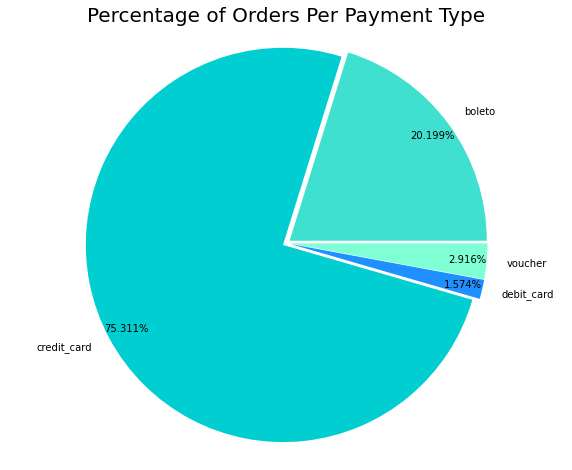

In [ ]:
plt.figure(figsize=(10, 8))
data = eda3['number_of_orders']
labels = eda3['payment_type']
explode = [0.02,0.02,0.02,0.02]
colors = ['turquoise','darkturquoise','dodgerblue','aquamarine']
plt.pie(data,labels=labels,autopct='%1.3f%%',explode=explode,pctdistance=0.9,labeldistance=1.1,colors=colors)
plt.title('Percentage of Orders Per Payment Type', fontsize=20)
plt.axis('equal')
plt.show()

**Insight**



Most of the transaction paid with credit_card payment, while boleto in 2nd place for payment options and the rest is not very popular option for customers (debit card & voucher).



# **Python Advance Assignment - Customer Segmentation**

## **Data Preparation**

In [ ]:
# Import necessary libraries
from sklearn import cluster
from sklearn.preprocessing import MinMaxScaler
from silhoutte import silhoutte_analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       91659 non-null  object        
 1   customer_id                    91659 non-null  object        
 2   order_status                   91659 non-null  object        
 3   order_purchase_timestamp       91659 non-null  datetime64[ns]
 4   order_delivered_customer_date  91659 non-null  object        
 5   order_estimated_delivery_date  91659 non-null  datetime64[ns]
 6   customer_unique_id             91659 non-null  object        
 7   customer_city                  91659 non-null  object        
 8   customer_state                 91659 non-null  object        
 9   payment_sequential             91659 non-null  object        
 10  payment_type                   91659 non-null  object        
 11  payment_install

We will create customer segmentation based on RFM (Recency, Frequency, Monetary) analysis. So we will create new dataframe for each `customer_unique_id` containing recency, frequency and total spend records.

First of all, we need to drop irrelevant column to cluster analysis.

In [ ]:
df_cluster = df.copy()
relevant_column = ['order_id','customer_unique_id','order_purchase_timestamp','payment_value']
df_cluster = df_cluster[(relevant_column)]
df_cluster.head()

,order_id,customer_unique_id,order_purchase_timestamp,payment_value
0,e481f51cbdc54678b7cc49136f2d6af7,7c396fd4830fd04220f754e42b4e5bff,2017-10-02 10:56:33,18.12
1,53cdb2fc8bc7dce0b6741e2150273451,af07308b275d755c9edb36a90c618231,2018-07-24 20:41:37,141.46
2,47770eb9100c2d0c44946d9cf07ec65d,3a653a41f6f9fc3d2a113cf8398680e8,2018-08-08 08:38:49,179.12
3,949d5b44dbf5de918fe9c16f97b45f8a,7c142cf63193a1473d2e66489a9ae977,2017-11-18 19:28:06,72.20
4,ad21c59c0840e6cb83a9ceb5573f8159,72632f0f9dd73dfee390c9b22eb56dd6,2018-02-13 21:18:39,28.62


In [ ]:
df_cluster.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91659 entries, 0 to 99431
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   order_id                  91659 non-null  object        
 1   customer_unique_id        91659 non-null  object        
 2   order_purchase_timestamp  91659 non-null  datetime64[ns]
 3   payment_value             91659 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.5+ MB


In [ ]:
df_cluster['customer_unique_id'].nunique()

88662

Now we will create a dataframe with recency record for each `customer_unique_id`.

In [ ]:
df_recent = df_cluster.loc[df_cluster.groupby('customer_unique_id')['order_purchase_timestamp'].idxmax(),:].reset_index()
df_recent['recency'] = (df_recent['order_purchase_timestamp'].max()-df_recent['order_purchase_timestamp']).dt.days
df_recent = df_recent[['customer_unique_id','recency']]
df_recent.head()

,customer_unique_id,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,160
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163
2,0000f46a3911fa3c0805444483337064,585
3,0000f6ccb0745a6a4b88665a16c9f078,369
4,0004aac84e0df4da2b147fca70cf8255,336


In [ ]:
df_recent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  88662 non-null  object
 1   recency             88662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


Secondly, we will create another dataframe with frequency (total orders) record for each `customer_unique_id`.

In [ ]:
df_freq = df_cluster.groupby(['customer_unique_id']).count()
df_freq =pd.DataFrame(df_freq).reset_index()
df_freq = df_freq[['customer_unique_id','order_id']]
df_freq.rename(columns={'order_id':'total_orders'},inplace=True)
df_freq.head()

,customer_unique_id,total_orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1


In [ ]:
df_freq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_unique_id  88662 non-null  object
 1   total_orders        88662 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


Last, we will create dataframe containing total spend record for each `customer_unique_id`.

In [ ]:
df_money = df_cluster.groupby(['customer_unique_id']).sum()
df_money = pd.DataFrame(df_money).reset_index()
df_money.head()

,customer_unique_id,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89


In [ ]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88662 entries, 0 to 88661
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  88662 non-null  object 
 1   payment_value       88662 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.4+ MB


Now we will join for every dataframe.

In [ ]:
cluster_join = df_recent.merge(df_freq,on='customer_unique_id').merge(df_money,on='customer_unique_id')
cluster_join.head()

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


In [ ]:
cluster_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88662 entries, 0 to 88661
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_unique_id  88662 non-null  object 
 1   recency             88662 non-null  int64  
 2   total_orders        88662 non-null  int64  
 3   payment_value       88662 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.4+ MB


### **Remove the Outliers**

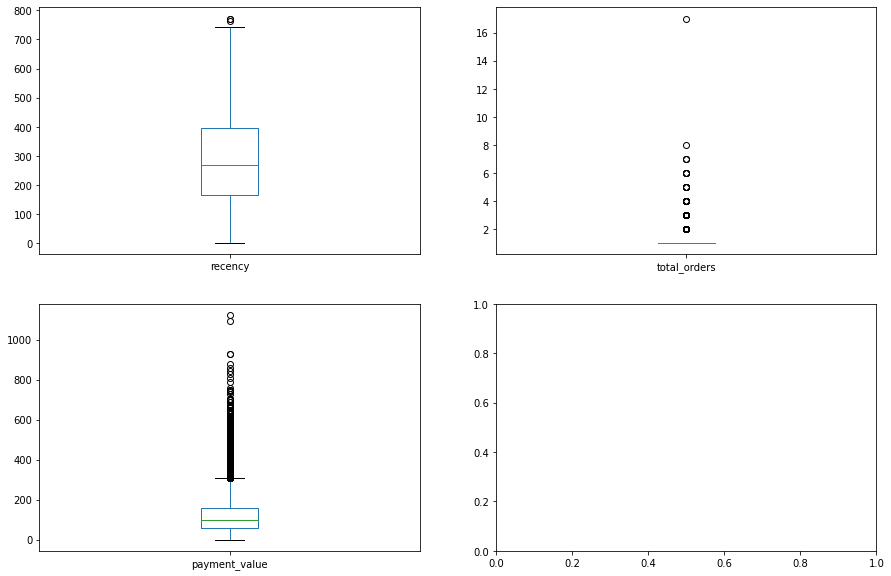

In [ ]:
## Checking for outliers
numerical_col = ['recency','total_orders','payment_value']

fig,axes = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
for i, el in enumerate(numerical_col):
  a = cluster_join.boxplot(el,ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
cluster_outliers = cluster_join.copy()

# Define function for checking outliers
def check_outliers(data,col_name):
  q1 = data[col_name].quantile(0.25)
  q3 = data[col_name].quantile(0.75)
  iqr = q3 - q1
  c_min = q1 - 1.5*iqr
  c_max = q3 + 1.5*iqr
  print('Q1: ',q1)
  print('Q3: ',q3)
  print('IQR: ',iqr)
  print('Min: ',c_min)
  print('Max: ',c_max)

We check for outliers on `recency` column and then remove the outliers.

In [ ]:
check_outliers(cluster_outliers,'recency')

Q1:  164.0
Q3:  397.0
IQR:  233.0
Min:  -185.5
Max:  746.5


In [ ]:
print('Total rows before remove outliers ',len(cluster_join))

# Remove the outliers
cluster_outliers = cluster_outliers[(cluster_outliers['recency'] >= -185.5) & (cluster_outliers['recency'] < 746.5)]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows before remove outliers  88662
Total rows after remove outliers  88659


Now we will check the outliers on `total_orders` column and then remove the outliers.

In [ ]:
check_outliers(cluster_outliers,'total_orders')

Q1:  1.0
Q3:  1.0
IQR:  0.0
Min:  1.0
Max:  1.0


Most of the customers (without outliers) only order 1 time in a time. We will drop rows with `total_orders` > 6 (far away from Max value).

In [ ]:
# Remove the outliers
cluster_outliers = cluster_outliers[cluster_outliers['total_orders'] <= 6]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows after remove outliers  88654


Now we will check the outliers on `payment_value` column and then remove the outliers.

In [ ]:
check_outliers(cluster_outliers,'payment_value')

Q1:  58.082499999999996
Q3:  158.45
IQR:  100.36749999999999
Min:  -92.46874999999999
Max:  309.00124999999997


In [ ]:
# Remove the outliers
cluster_outliers = cluster_outliers[(cluster_outliers['payment_value'] >= -92.47) & (cluster_outliers['payment_value'] < 309)]
print('Total rows after remove outliers ',len(cluster_outliers))

Total rows after remove outliers  86204


Boxplot after remove the outliers

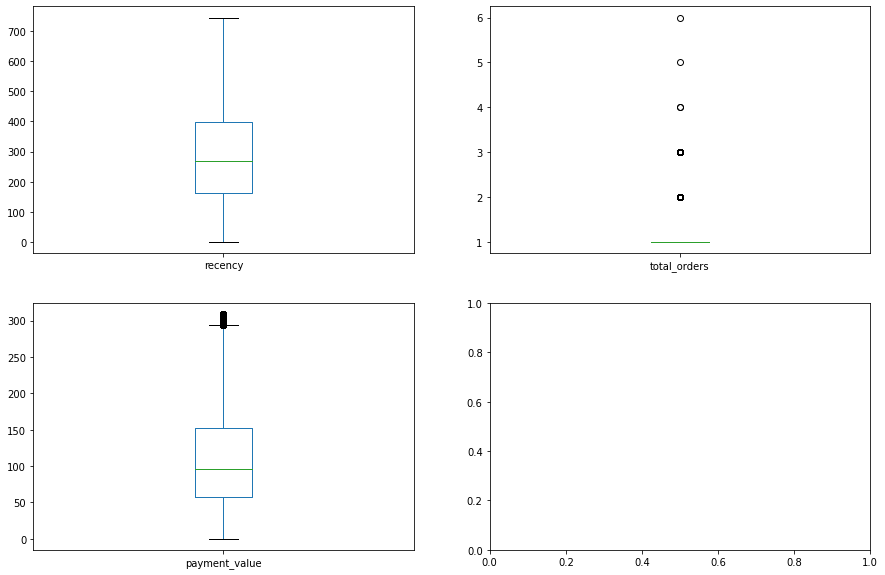

In [ ]:
numerical_col = ['recency','total_orders','payment_value']

fig,axes = plt.subplots(nrows=2, ncols = 2, figsize=(15,10))
for i, el in enumerate(numerical_col):
  a = cluster_outliers.boxplot(el,ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
cluster_clean = cluster_outliers.copy()
cluster_clean.head()

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19
2,0000f46a3911fa3c0805444483337064,585,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89


### **Scaling All Numeric Columns**

Because `recency`, `total_orders` and `payment_value` have numeric values, we will scale the value of each records first.

In [ ]:
numerical_col

['recency', 'total_orders', 'payment_value']

In [ ]:
cluster_scale = cluster_clean.copy()
scaler = MinMaxScaler()
cluster_scale[numerical_col] = scaler.fit_transform(cluster_scale[numerical_col])
cluster_scale

,customer_unique_id,recency,total_orders,payment_value
0,0000366f3b9a7992bf8c76cfdf3221e2,0.215054,0.0,0.459265
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0.219086,0.0,0.087975
2,0000f46a3911fa3c0805444483337064,0.786290,0.0,0.279042
3,0000f6ccb0745a6a4b88665a16c9f078,0.495968,0.0,0.141156
4,0004aac84e0df4da2b147fca70cf8255,0.451613,0.0,0.637255
...,...,...,...,...
88657,fffbf87b7a1a6fa8b03f081c5f51a201,0.393817,0.0,0.541544
88658,fffea47cd6d3cc0a88bd621562a9d061,0.416667,0.0,0.273734
88659,ffff371b4d645b6ecea244b27531430a,0.829301,0.0,0.363975
88660,ffff5962728ec6157033ef9805bacc48,0.225806,0.0,0.432691


## **Clustering Analysis**

### **Determine Cluster Number**

To determine cluster number, we will use two method:

*   Elbow Method
*   Silhouette Analysis



#### **Elbow Method**

In [ ]:
### Drop the column that are not needed
cluster_check = cluster_scale.copy()
cluster_check = cluster_scale.drop(['customer_unique_id'],axis=1)
cluster_check.head()

,recency,total_orders,payment_value
0,0.215054,0.0,0.459265
1,0.219086,0.0,0.087975
2,0.786290,0.0,0.279042
3,0.495968,0.0,0.141156
4,0.451613,0.0,0.637255


The cluster range to check is from 2 to 10 which is range that make sense for business.

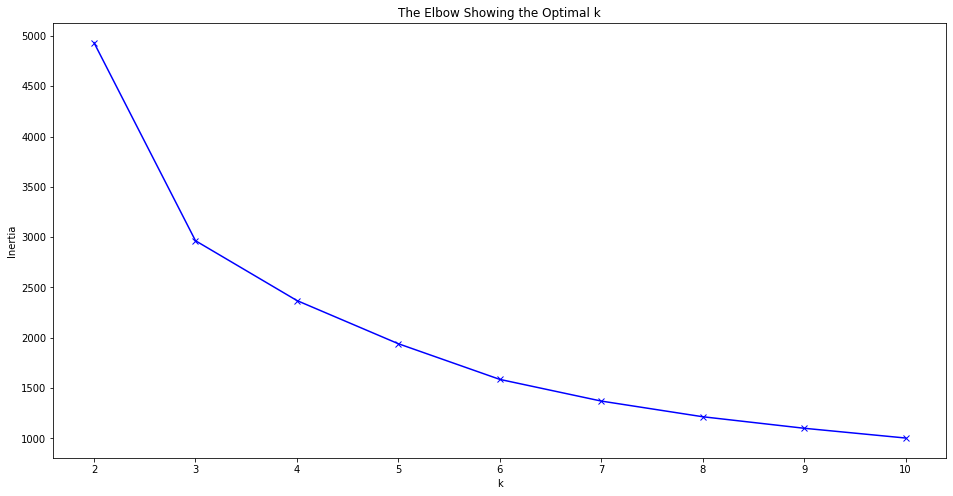

In [ ]:
distortions = []
K = range(2,11)
for k in K:
  kmeanModel = cluster.KMeans(n_clusters=k)
  kmeanModel.fit(cluster_check)
  distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions,'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Showing the Optimal k')
plt.show()

#### **Silhouette Analysis**

For n_clusters = 2 The average silhouette_score is : 0.37137875809963794
For n_clusters = 3 The average silhouette_score is : 0.3996631384440344
For n_clusters = 4 The average silhouette_score is : 0.3768832875918653
For n_clusters = 5 The average silhouette_score is : 0.3431786118007398
For n_clusters = 6 The average silhouette_score is : 0.3496988837626782
For n_clusters = 7 The average silhouette_score is : 0.3547110983394691
For n_clusters = 8 The average silhouette_score is : 0.3500271403436149
For n_clusters = 9 The average silhouette_score is : 0.34968184138023956
For n_clusters = 10 The average silhouette_score is : 0.3357358413263723


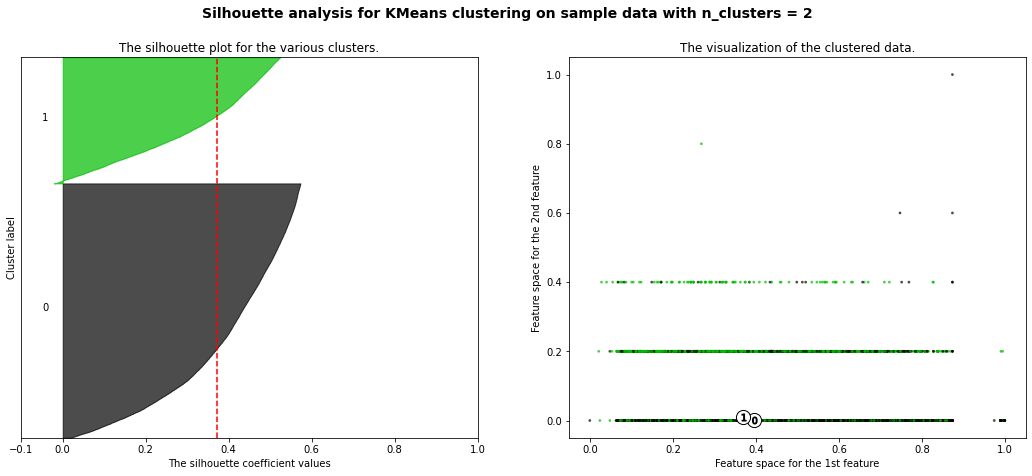

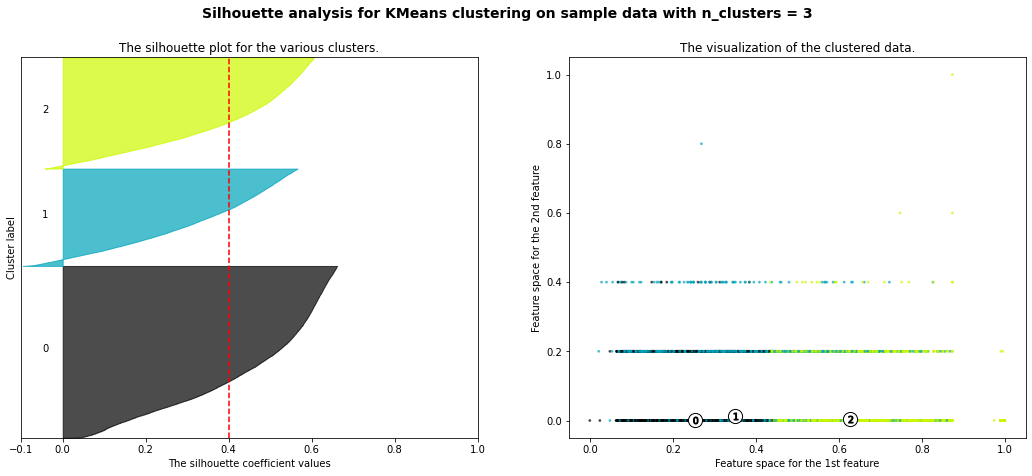

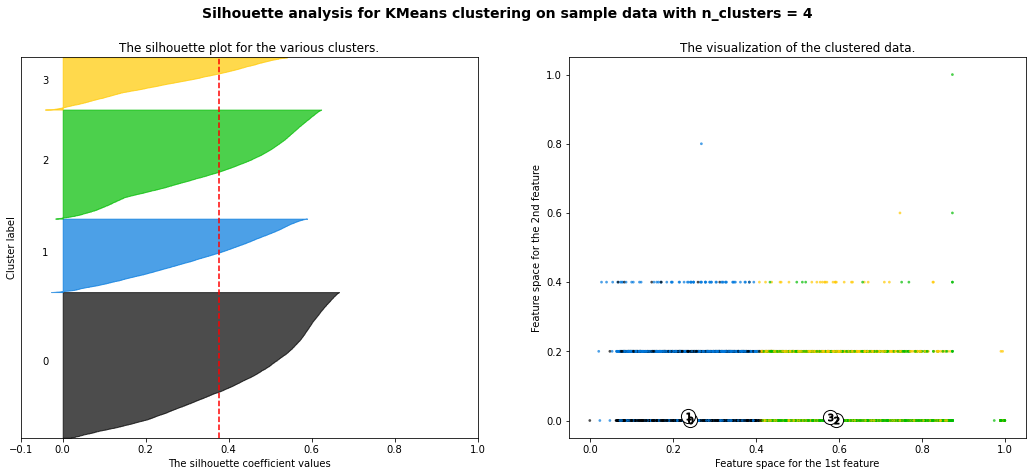

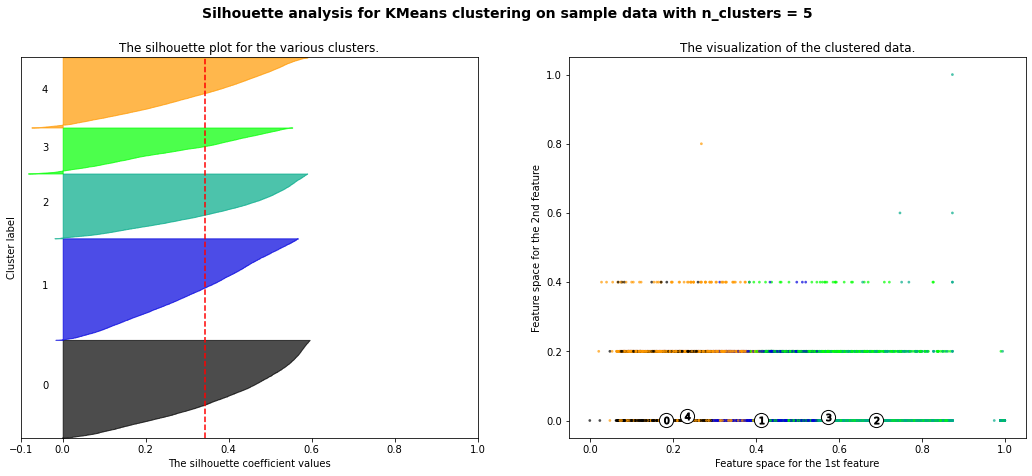

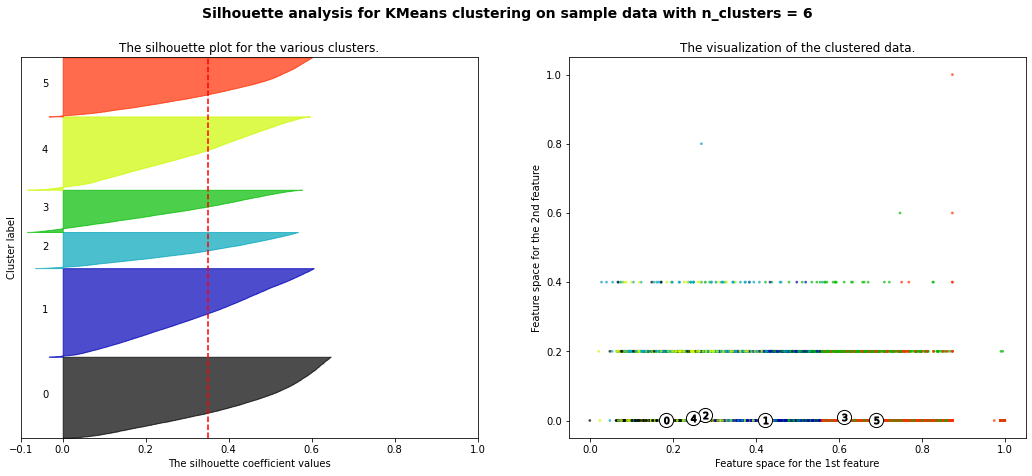

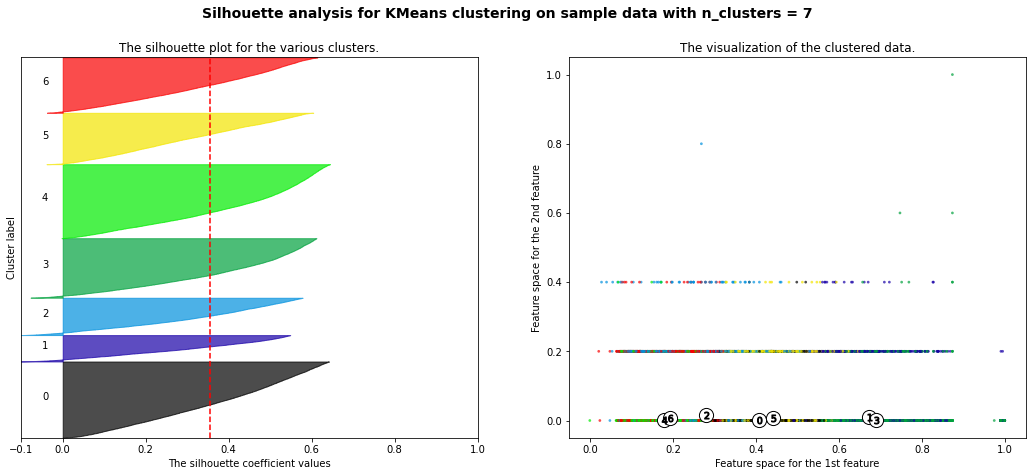

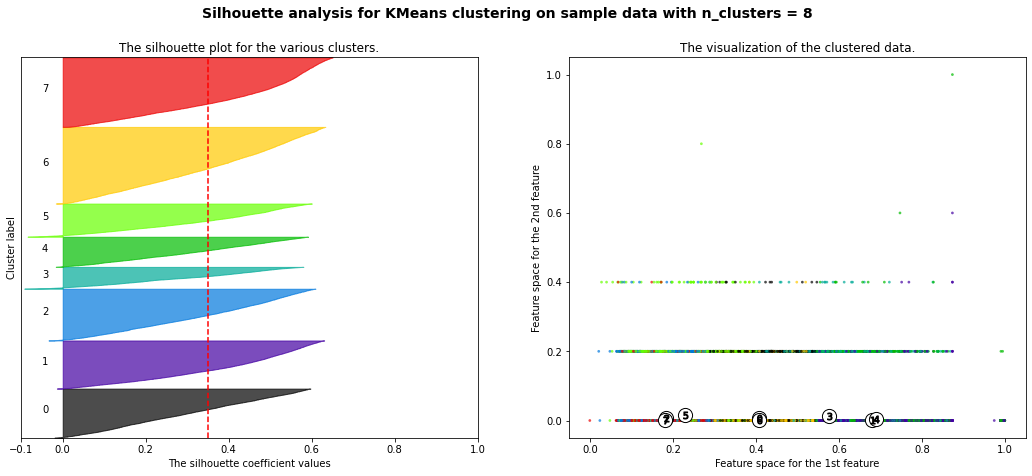

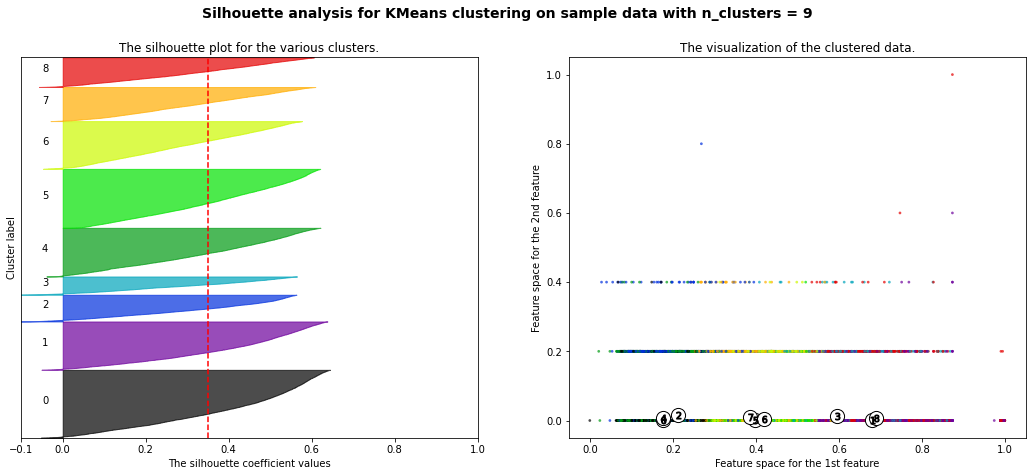

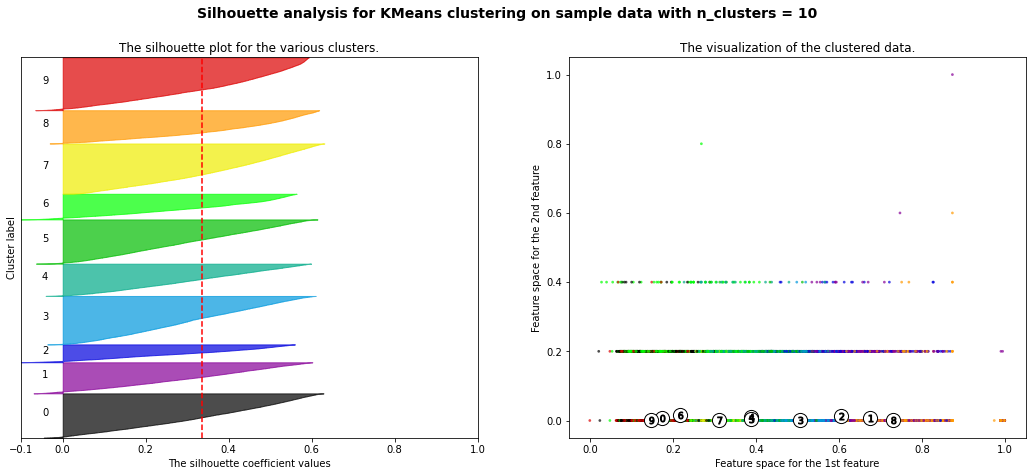

In [ ]:
  silhoutte_analysis(cluster_check,list(range(2,11)))

Based on Elbow method and Silhouette results, we can choose cluster = 3.

### **Clustering Data**

In [ ]:
cluster_model = cluster.KMeans(n_clusters=3, random_state = 2)
cluster_model.fit(cluster_check)
cluster_label = cluster_model.labels_
cluster_clean['cluster'] = cluster_label
cluster_clean

,customer_unique_id,recency,total_orders,payment_value,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,160,1,141.90,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,163,1,27.19,0
2,0000f46a3911fa3c0805444483337064,585,1,86.22,1
3,0000f6ccb0745a6a4b88665a16c9f078,369,1,43.62,1
4,0004aac84e0df4da2b147fca70cf8255,336,1,196.89,2
...,...,...,...,...,...
88657,fffbf87b7a1a6fa8b03f081c5f51a201,293,1,167.32,2
88658,fffea47cd6d3cc0a88bd621562a9d061,310,1,84.58,0
88659,ffff371b4d645b6ecea244b27531430a,617,1,112.46,1
88660,ffff5962728ec6157033ef9805bacc48,168,1,133.69,0


In [ ]:
cluster_clean.groupby('cluster')['recency','total_orders','payment_value'].agg(['count','mean','median','max','min'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


recency                              total_orders                   \
          count        mean median  max  min        count      mean median   
cluster                                                                      
0         38675  187.637854  187.0  343    0        38675  1.011791    1.0   
1         25491  464.297203  456.0  744  314        25491  1.016437    1.0   
2         22038  259.385289  250.0  743   16        22038  1.058399    1.0   

                payment_value                                      
        max min         count        mean  median     max     min  
cluster                                                            
0         3   1         38675   74.334760   69.70  155.01    0.01  
1         6   1         25491   85.653897   79.24  252.19    0.01  
2         5   1         22038  203.013673  195.00  308.96  130.32

All clusters have similar mean and median of `total_orders` frequency score. Most of the customers are 1 time purchasers. Only few customers with repat purchase in this case.

Due to this condition, we will naming the clusters based on recency score and monetary score (`payment_value`).

By looking at the median value for both metrics, we can see the general characteristics for each cluster are:
* cluster 0: Low spend and recent purchase
* cluster 1: High spend and quite long time since last purchase
* cluster 2: Moderate spend and long time since last purchase

We can naming for all clusters as follows:
* cluster 0: Let Minnow
* cluster 1: It's been a Whale
* cluster 2: Dolphin-itely miss you

## **Insight & Recommendation**

By looking at the result of analysis, we can get several insight:


1.   Each cluster have good proportion to other clusters, there is no significant difference of one or more clusters.
2.   "Let Minnow" cluster have greatest population comparing to others, about 34% more from the 2nd highest. This means the population of customers with small amount of spending but did the purchases most recent on the platform.
3.  The least population come from "It's been a Whale" which means around 25% of total customers of the platform. This means the customers with big amount of spending in risks of leaving the platform since it quite a while since their latest transaction.
4.  The rest of population is "Dolphin-itely miss you" cluster which means customers with moderate amount of spending and can be categorized as lost customers since it have been a long time since their latest transaction. Around 29% of total customers come from this cluster.
5.  From the dataset, we can see most of customers are 1 time customers. Only few customers made purchase for several times.


To improve the future customer engagement, there are several recommendation to be considered:


1.  To minimize the risks of customer retention, campaign for customers with "It's been a Whale" should be more focussed.
2.  Beside the campaign, company should doing analysis for the customers's habit, this can be improving ads, product recommendation and promotion for customers.
3.  To bring back the the customers who have left, company needs to consider to start the campaign by giving them promo such as promo campaign with certain payment method or specific payment gatway/ provider. This campaign can be focussed on "Dolphin-itely miss you" and "It's been a Whale" customers.
4.  For "Let Minnow" customers, campaign to boost the spending amount and to keep them stay with the platform is strongly recommended. Such as cahsback promo or rewarding referall can be the option for the campaign.

